In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
from matplotlib import rc
import scipy.integrate as integrate
from scipy.special import factorial
from tqdm import tqdm

In [2]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [3]:
# Likelihood function
def Likelihood(n,b,s,mu):

    lambda_ = mu*s + b

    try:
        L = np.exp( -lambda_ )*lambda_**n / factorial(n)
    except OverflowError: 
        L = 0.

    return L

In [4]:
# Log Prior
def LogPrior(p):

    mu = p 

    if np.isscalar(mu):
        return 0. if mu >= 0. else -np.inf
    else:
        return 0. if np.any(mu >= 0.) else -np.inf
    

In [5]:
def GetJointLogLikelihood(mu,channels):

    n = channels[:,0]
    b = channels[:,1]
    s = channels[:,2]

    N = channels.shape[0]

    # log-likelihood contribution
    Joint = 0.

    for c in range(N):
        Joint += np.log(Likelihood( n[c], b[c], s[c], mu ))

    return Joint 

In [6]:
def LogPosterior(p,channels):
    return GetJointLogLikelihood(p,channels) + LogPrior(p)

In [7]:
channels = np.array([[3.,8.,8.],[3.,4.,5.],[1.,3.,3.]],dtype=float)

In [8]:
GetJointLogLikelihood(1.3,channels)

-21.660819761517644

In [9]:
LogPosterior(1.3,channels)

-21.660819761517644

In [10]:
mu = np.linspace(0.,2.,100)
Posterior = LogPosterior(mu,channels)

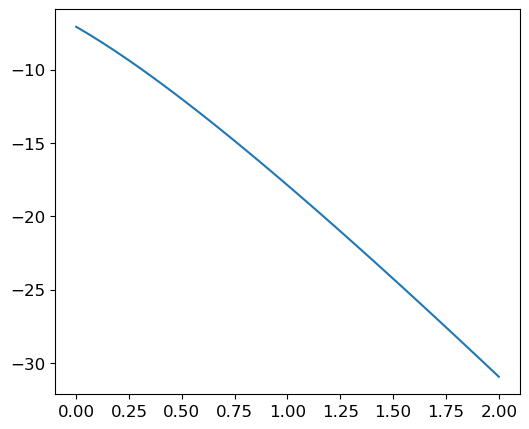

In [11]:
plt.plot(mu,Posterior)